# Learning and Decision Making

## Laboratory 6: Reinforcement learning

In the end of the lab, you should submit all code/answers written in the tasks marked as "Activity n. XXX", together with the corresponding outputs and any replies to specific questions posed to the e-mail <adi.tecnico@gmail.com>. Make sure that the subject is of the form [&lt;group n.&gt;] LAB &lt;lab n.&gt;.

### 1. The windy gridworld domain

Consider the larger version of the windy gridworld domain depicted in the figure below.

<img src="windy.png" width="400px">

In it, a boat must navigate a 7 &times; 10 gridworld, to reach the goal cell, marked with _G_. There is a crosswind upward through the middle of the grid, in the direction indicated by the gray arrows. The boat has available the standard four actions -- _Up_, _Down_, _Left_ and _Right_. In the region affected by the wind, however, the resulting next state is shifted upward as a consequence of the crosswind, the strength of which varies from column to column. The strength of the wind is given below each column, and corresponds to the number of cells that the movement is shifted upward. For example, if the boat is one cell to the right of the goal, then the action _Left_ takes you to the cell just above the goal.

The agent pays a cost of 1 in every step before reaching the goal. The problem can be described as an MDP $(\mathcal{X},\mathcal{A},\mathbf{P},c,\gamma)$ as follows.

In [94]:
%matplotlib notebook
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt

np.set_printoptions(threshold=10)

# Problem specific parameters
WIND = (0, 0, 0, 1, 1, 1, 2, 2, 1, 0)
nrows = 7
ncols = 10
init = [3, 0]
goal = [3, 7]

# States
X = [[x, y] for x in range(nrows) for y in range(ncols)]
nX = len(X)

# Actions
A = ['U', 'D', 'L', 'R']
nA = len(A)

# Transition probabilities
P = dict()
P['U'] = np.zeros((nX, nX))
P['D'] = np.zeros((nX, nX))
P['L'] = np.zeros((nX, nX))
P['R'] = np.zeros((nX, nX))

for i in range(len(X)):
    x = X[i]
    y = dict()
    
    y['U'] = [x[0] - WIND[x[1]] - 1, x[1]]
    y['D'] = [x[0] - WIND[x[1]] + 1, x[1]]
    y['L'] = [x[0] - WIND[x[1]], x[1] - 1]
    y['R'] = [x[0] - WIND[x[1]], x[1] + 1]
    
    for k in y:
        y[k][0] = max(min(y[k][0], nrows - 1), 0)
        y[k][1] = max(min(y[k][1], ncols - 1), 0)
        j = X.index(y[k])
        P[k][i, j] = 1

c = np.ones((nX, nA))
c[X.index(goal), :] = 0

gamma = 0.99

# -- Pretty print

print('\n- MDP problem specification: -\n')

print('States:')
print(np.array(X))

print('\nActions:')
print(A)

print('\nTransition probabilities:')
for a in A:
    print('Action', a)
    print(P[a])
    
print('\ncost:')
print(c)

print('\nStart state:', init)
print('\nGoal state:', goal)


- MDP problem specification: -

States:
[[0 0]
 [0 1]
 [0 2]
 ..., 
 [6 7]
 [6 8]
 [6 9]]

Actions:
['U', 'D', 'L', 'R']

Transition probabilities:
Action U
[[ 1.  0.  0. ...,  0.  0.  0.]
 [ 0.  1.  0. ...,  0.  0.  0.]
 [ 0.  0.  1. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
Action D
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  1.  0.]
 [ 0.  0.  0. ...,  0.  0.  1.]]
Action L
[[ 1.  0.  0. ...,  0.  0.  0.]
 [ 1.  0.  0. ...,  0.  0.  0.]
 [ 0.  1.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  1.  0.]]
Action R
[[ 0.  1.  0. ...,  0.  0.  0.]
 [ 0.  0.  1. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  1.]]

cost:
[[ 1.  1

---

#### Activity 1.        

Compute the optimal _Q_-function for the MDP defined above using value iteration. As your stopping condition, use an error between iterations smaller than `1e-8`.

---

In [96]:
Qstar = np.zeros((nX, nA))
err = 1

while err > 1e-8:
    
    J = Qstar.min(axis = 1)
    QU = c[:, 0] + gamma * P['U'].dot(J)
    QD = c[:, 1] + gamma * P['D'].dot(J)
    QL = c[:, 2] + gamma * P['L'].dot(J)
    QR = c[:, 3] + gamma * P['R'].dot(J)
        
    Qnew = np.concatenate((QU[:, None], QD[:, None], QL[:, None], QR[:, None]), axis = 1)
    err = np.linalg.norm(Qnew - Qstar)
    Qstar = Qnew
    
print(Qstar)

[[ 88.97864983  88.97864983  88.97864983  88.86732306]
 [ 88.86732306  88.86732306  88.97864983  88.75487178]
 [ 88.75487178  88.75487178  88.86732306  88.64128462]
 ..., 
 [ 87.18534608  87.44035769  88.29359262  87.31349262]
 [ 87.31349262  87.44035769  87.44035769  87.56595412]
 [ 87.56595412  87.56595412  87.44035769  87.56595412]]


---

#### Activity 2.        

Write down a Python function that, given a Q-function $Q$ and a state $x$, selects a random action using the $\epsilon$-greedy policy obtained from $Q$ for state $x$. Your function should receive an optional parameter, corresponding to $\epsilon$, with default value of 0.1. 

**Note:** In the case of two actions with the same value, your $\epsilon$-greedy policy should randomize between the two.

---

In [97]:
def min_number(list):
    index = []
    i, minim = 0, 1e1000
    while i < len(list):
        if list[i] < minim:
            del index[:]
            index.append(i)
            minim = list[i]
        elif list[i] == minim:
            index.append(i)
        i += 1
    return np.random.choice(index)

def greedy_policy(Qfunc, state, epsilon = 0.1):
    state = X.index(state)
    actionNum = min_number(Qfunc[state])
    action = A[actionNum]
    choice = np.random.choice(['exploit', 'explore'], 1, p = [1 - epsilon, epsilon])
    if choice == 'exploit':
        return action
    elif choice == 'explore':
        actionNum = np.random.randint(nA)
        action = A[actionNum]
        return action

### 2. Model-based learning

You will now run the model-based learning algorithm discussed in class, and evaluate its learning performance.

---

#### Activity 3.        

Run the model-based reinforcement learning algorithm discussed in class to compute $Q^*$ for 100,000 iterations. Initialize each transition probability matrix as the identity and the cost function as all-zeros. Use an $\epsilon$-greedy policy with $\epsilon=0.1$ (use the function from Activity 2). Note that, at each step,

* You will need to select an action according to the $\epsilon$-greedy policy;
* The state and action, you will then compute the cost and generate the next state; 
* With this transition information (state, action, cost, next-state), you can now perform an update. 
* When updating the components $(x,a)$ of the model, use the step-size

$$\alpha_t=\frac{1}{N_t(x,a)+1},$$

where $N_t(x,a)$ is the number of visits to the pair $(x,a)$ up to time step $t$.

In order to ensure that your algorithm visits every state and action a sufficient number of times, after the boat reaches the goal cell, make one further step, the corresponding update, and then reset the position of the boat to a random state in the environment.

Plot the norm $\|Q^*-Q^{(k)}\|$ every 500 iterations of your method, where $Q^*$ is the optimal _Q_~function computed in Activity 1.

**Note:** The simulation may take a bit. Don't despair.

---

[[ 88.94691217  88.93449657  88.94691217  88.83748744]
 [ 88.80425396  88.77192088  88.80425396  88.72706303]
 [ 88.64587242  88.67578175  88.7744272   88.61536506]
 ..., 
 [ 87.15610419  87.3588467   87.77852186  87.24880435]
 [ 87.28454315  87.38585278  87.29579779  87.35074507]
 [ 87.48525824  87.43266534  87.40669779  87.43266534]]


<IPython.core.display.Javascript object>


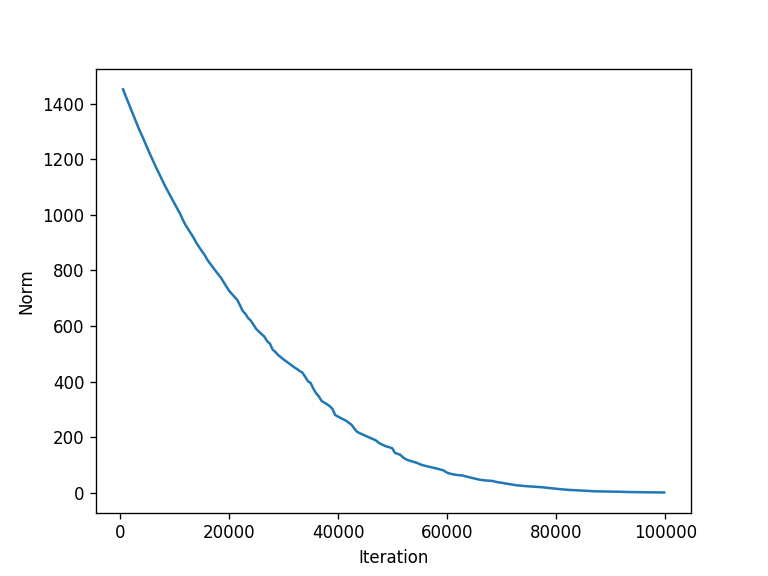

/home/santos/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


In [98]:
%matplotlib notebook
import time
Pm = dict()
state = init
state_num = X.index(init)
Q = np.zeros((nX, nA))
N = np.zeros((nX, nA))
cm = np.zeros((nX, nA))
norm, iteration = [], []
for a in A:
    Pm[a] = np.ones((nX, nX)) / nX
it = 499
goal_state = False
t = time.time()

for i in range(100000):
    #Calculate data-points
    if state == goal:
        goal_state = True
        
    action = greedy_policy(Q, state, 0.1)
    action_num = A.index(action)
    cost = c[state_num][action_num]
    next_state_num = list(P[action][state_num]).index(np.max(P[action][state_num]))
    next_state = X[next_state_num]
    data_point = (state, action, cost, next_state)
    
    #Update cost function, transition probabilities and Q-function
    alpha = 1 / (N[state_num][action_num] + 1)
    N[state_num][action_num] += 1
    
    cm[state_num][action_num] += alpha * (cost - cm[state_num][action_num])
    
    Pm[action][state_num] *= (1 - alpha)
    Pm[action][state_num][next_state_num] += alpha
    
    Q[state_num][action_num] = cm[state_num][action_num] + \
                               gamma * (Pm[action][state_num].dot(np.min(Q, axis=1)))
    
    if goal_state == False:
        state = next_state
        state_num = next_state_num
    else:
        state_num = np.random.randint(len(X))
        state = X[state_num]    
        goal_state = False
    
    if i == it:
        norm.append(np.linalg.norm(Qstar - Q))
        iteration.append(i)
        it += 499
tTotal = time.time() - t
print(Q)

plt.xlabel('Iteration')
plt.ylabel('Norm')
plt.legend(loc='best')
plt.plot(iteration, norm)

### 3. Temporal-difference learning

You will now run both Q-learning and SARSA, and compare their learning performance with that of the model-based method just studied.

---

#### Activity 4.        

Repeat Activity 3 but using the _Q_-learning algorithm with a learning rate $\alpha=0.3$.

---

[[ 84.11041899  84.0866698   84.07027728  84.13441619]
 [ 84.2000173   84.17031943  84.17067038  84.21078555]
 [ 84.25156271  84.24352474  84.27939048  84.26080433]
 ..., 
 [ 28.68846638  26.44449953  28.56904304  13.64565658]
 [ 82.88546259  82.84126757  82.84131164  82.90054648]
 [ 82.9623913   82.94478762  82.97839661  82.97971668]]


<IPython.core.display.Javascript object>


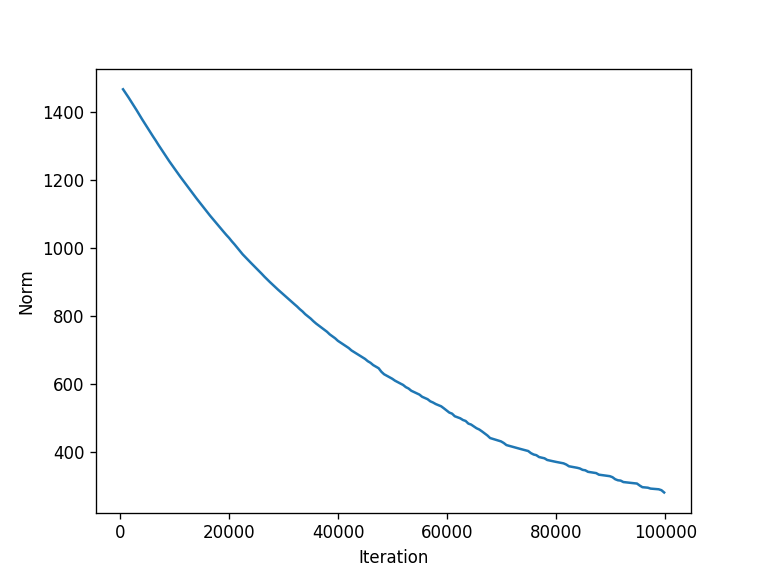

/home/santos/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


In [99]:
%matplotlib notebook
state = init
state_num = X.index(init)
Q = np.zeros((nX, nA))
alpha = 0.3
it = 499
goal_state = False
norm = []
t = time.time()

for i in range(100000):
    #Calculate data-points
    if state == goal:
        goal_state = True
        
    action = greedy_policy(Q, state, 0.1)
    action_num = A.index(action)
    cost = c[state_num][action_num]
    next_state_num = list(P[action][state_num]).index(np.max(P[action][state_num]))
    next_state = X[next_state_num]
    data_point = (state, action, cost, next_state)
    
    Q[state_num][action_num] += alpha * (cost + gamma * np.max(Q[next_state_num]) - Q[state_num][action_num])
    
    if goal_state == False:
        state = next_state
        state_num = next_state_num
    else:
        state_num = np.random.randint(len(X))
        state = X[state_num]    
        goal_state = False
    
    if i == it:
        norm.append(np.linalg.norm(Qstar - Q))
        it += 499
        
tTotal2 = time.time() - t
print(Q)

plt.xlabel('Iteration')
plt.ylabel('Norm')
plt.legend(loc='best')
plt.plot(iteration, norm)

---

#### Activity 5.

Repeat Activity 4 but using the SARSA algorithm.

---

[[ 68.4082451   68.47265004  68.45807045  68.35244109]
 [ 68.53166684  68.41631386  68.47020181  68.53804117]
 [ 68.62137378  68.62084611  68.63796969  68.60969625]
 ..., 
 [ 19.91228725  29.41412607  18.39265671  17.42207912]
 [ 66.78242991  66.88704691  66.83728955  66.82031621]
 [ 66.98108029  66.89864996  66.93030144  66.9411392 ]]


<IPython.core.display.Javascript object>


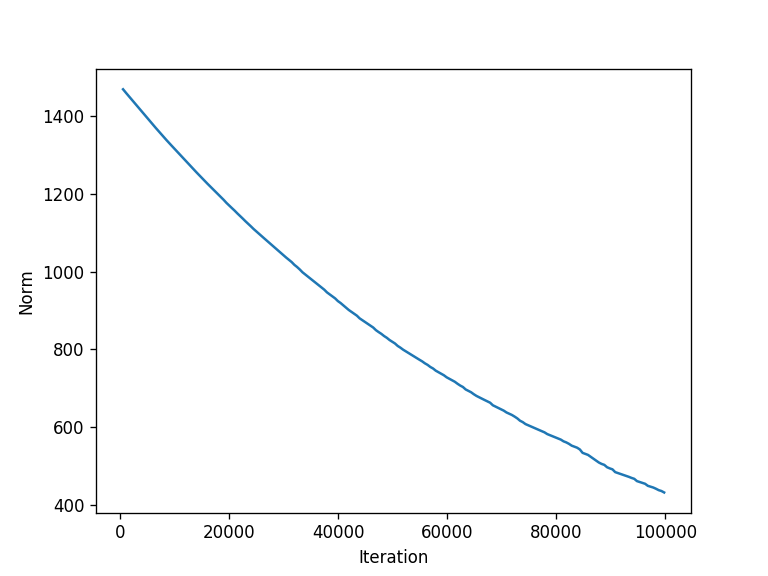

/home/santos/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


In [106]:
%matplotlib notebook
state = init
state_num = X.index(init)
action = greedy_policy(Q, state, 0.1)
action_num = A.index(action)
Q = np.zeros((nX, nA))
it = 499
goal_state = False
norm = []
t = time.time()

for i in range(100000):
    #Calculate data-points
    if state == goal:
        goal_state = True
        
    cost = c[state_num][action_num]
    next_state_num = list(P[action][state_num]).index(np.max(P[action][state_num]))
    next_state = X[next_state_num]
    next_action = greedy_policy(Q, next_state, 0.1)
    next_action_num = A.index(next_action)
    data_point = (state, action, cost, next_state, next_action)

    Q[state_num][action_num] += alpha * (cost + gamma * Q[next_state_num][next_action_num] - Q[state_num][action_num])
    
    if goal_state == False:
        state = next_state
        state_num = next_state_num
        action = next_action
        action_num = next_action_num
    else:
        state_num = np.random.randint(len(X))
        state = X[state_num]
        action = greedy_policy(Q, state, 0.1)
        action_num = A.index(action)
        goal_state = False
    
    if i == it:
        norm.append(np.linalg.norm(Qstar - Q))
        it += 499
        
tTotal3 = time.time() - t
print(Q)

plt.xlabel('Iteration')
plt.ylabel('Norm')
plt.legend(loc='best')
plt.plot(iteration, norm)

---

#### Activity 6.

Discuss the differences observed between the performance of the three methods.

---

In [107]:
print("O model-based reinforcement learning algorithm possui os melhores resultados, no entanto é o "\
      "que tem maior tempo de execução", tTotal, "segundos, devido ao cálculo das médias da função de custo e das "\
      "matrizes de probabilidade.\n")

print("O Q-Learning algorithm não segue uma política específica ao contrário do SARSA algorithm que segue a "\
      "política dada. No exemplo dado a função de custo é bastante minimalista o que torna a política muito "\
      "fraca, fazendo com que o SARSA tenha piores resultados. Assim, conclui-se que embora ambos os algoritmos "\
      "tenham tempos de execução semelhantes", tTotal2, "segundos e", tTotal3, "segundos, o Q-Learning algorithm "\
      "é mais eficiente.\n")

print("Ao analisar a diferença das normas dos 3 algoritmos conclui-se precisamente que o model-based converge "\
      "para a Qstar, o Q-learning fica na diferença dos 200 e o SARSA fica com uma diferença de 400.")

O model-based reinforcement learning algorithm possui os melhores resultados, no entanto é o que tem maior tempo de execução 23.044942617416382 segundos, devido ao cálculo das médias da função de custo e das matrizes de probabilidade.

O Q-Learning algorithm não segue uma política específica ao contrário do SARSA algorithm que segue a política dada. No exemplo dado a função de custo é bastante minimalista o que torna a política muito fraca, fazendo com que o SARSA tenha piores resultados. Assim, conclui-se que embora ambos os algoritmos tenham tempos de execução semelhantes 20.22089433670044 segundos e 18.730520248413086 segundos, o Q-Learning algorithm é mais eficiente.

Ao analisar a diferença das normas dos 3 algoritmos conclui-se precisamente que o model-based converge para a Qstar, o Q-learning fica na diferença dos 200 e o SARSA fica com uma diferença de 400.
